In [25]:
import os
import errno
import shutil
import pandas as pd
from statistics import mode,mean

IMAGES ='C:/Users/sanja/Desktop/flowerdet/data/train'
DIR = 'C:/Users/sanja/Desktop/flowerdet/data/train1/'

# Classes to be predicted
classes = []
for i in range(1,104):
    classes.append(str(i))

# Make directories
for class_ in classes:
    if not os.path.exists(DIR+class_):
        try:
            os.makedirs(DIR+class_)
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise
# Import training labels
data = pd.read_csv('C:/Users/sanja/Desktop/flowerdet/data/train.csv')


In [29]:

# Moving files in respective directories
for images, labels in zip(data['image_id'], data['category']):
    shutil.move(IMAGES+'/'+str(images)+'.jpg', DIR+str(labels)+'/'+str(images)+'.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/sanja/Desktop/flowerdet/data/train/0.jpg'

In [27]:
from fastai import *
from fastai.vision import *
from pathlib import Path
from fastai.callbacks import *

In [3]:
p = Path('C:/Users/sanja/Desktop/flowerdet/data/train1')
for c in classes:
  print(c)
  verify_images(p/c,delete=True,max_size=500)

KeyboardInterrupt: 

In [28]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from sklearn.utils import shuffle
from tqdm import tqdm_notebook

In [29]:
df = pd.read_csv('C:/Users/sanja/Desktop/flowerdet/data/train.csv')
df['category'].value_counts()

51    582
77    567
46    441
73    438
89    414
     ... 
21     90
7      90
1      90
27     90
45     90
Name: category, Length: 102, dtype: int64

In [6]:
df.head()

,image_id,category
0,0,77
1,1,81
2,2,52
3,3,72
4,4,58


In [30]:
path = 'C:/Users/sanja/Desktop/flowerdet/data/train1'

In [31]:
tfms = get_transforms(do_flip=True,flip_vert=True,max_zoom=1.2,max_warp=0.3,max_lighting=0.3,max_rotate=40.0,p_affine=0.75,p_lighting=0.75)
data = (ImageList.from_folder(path) 
        .split_by_rand_pct()              
        .label_from_folder()            
        .add_test_folder(test_folder = 'C:/Users/sanja/Desktop/flowerdet/data/test')              
        .transform(tfms, size=224)
        .databunch(bs=16,num_workers=10))

In [32]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (14832 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,1,1,1,1
Path: C:\Users\sanja\Desktop\flowerdet\data\train1;

Valid: LabelList (3708 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
99,19,44,92,69
Path: C:\Users\sanja\Desktop\flowerdet\data\train1;

Test: LabelList (2009 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: C:\Users\sanja\Desktop\flowerdet\data\train1

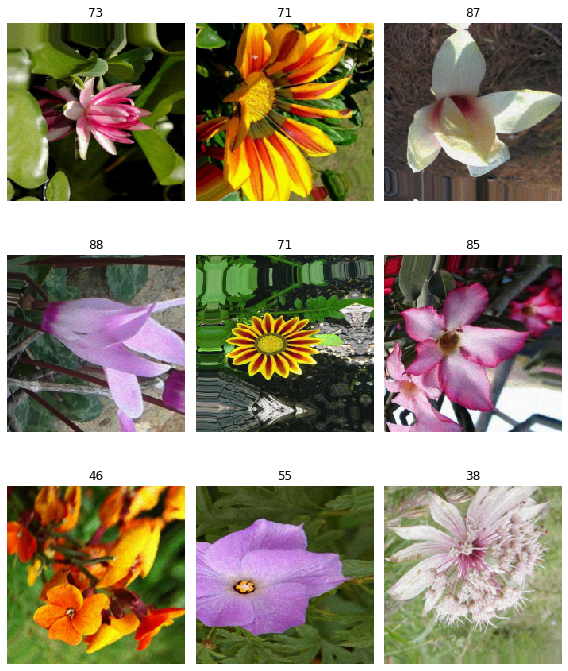

In [10]:
data.show_batch(rows=3, figsize=(8,10))

In [11]:
print(data.classes)

['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [7]:
learn = cnn_learner(data, models.resnet152, metrics=[accuracy], model_dir="models/")


In [8]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.773006,0.322924,0.915049,08:53
1,0.438192,0.135408,0.962783,08:33
2,0.281079,0.067017,0.978964,08:30
3,0.153617,0.033227,0.992718,08:25
4,0.102073,0.026748,0.993258,08:22


In [9]:
learn.save('resnet-152-stage-1')

In [10]:
interp = ClassificationInterpretation.from_learner(learn) ###interpret results

losses,idxs = interp.top_losses() ###finding which images that caused the most difficult for the model

len(data.valid_ds)==len(losses)==len(idxs)

True

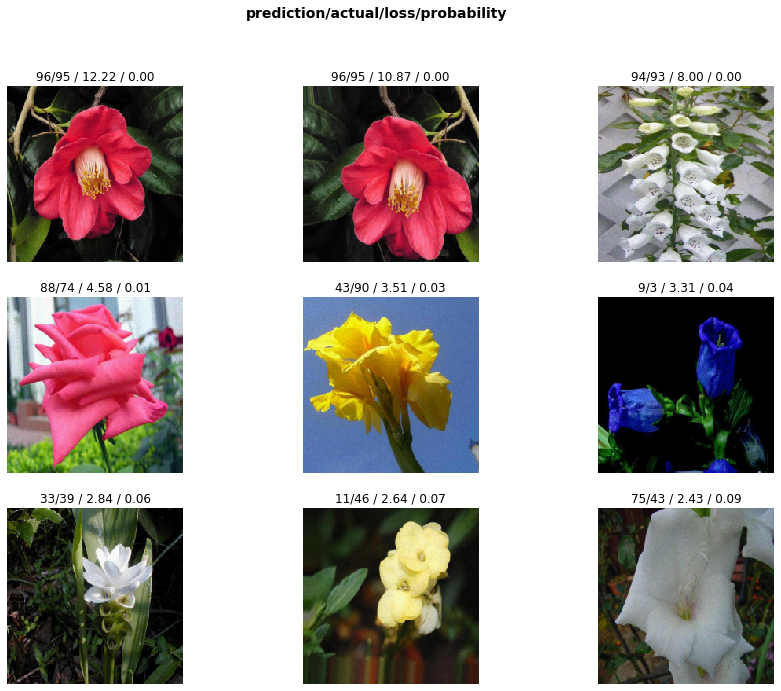

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

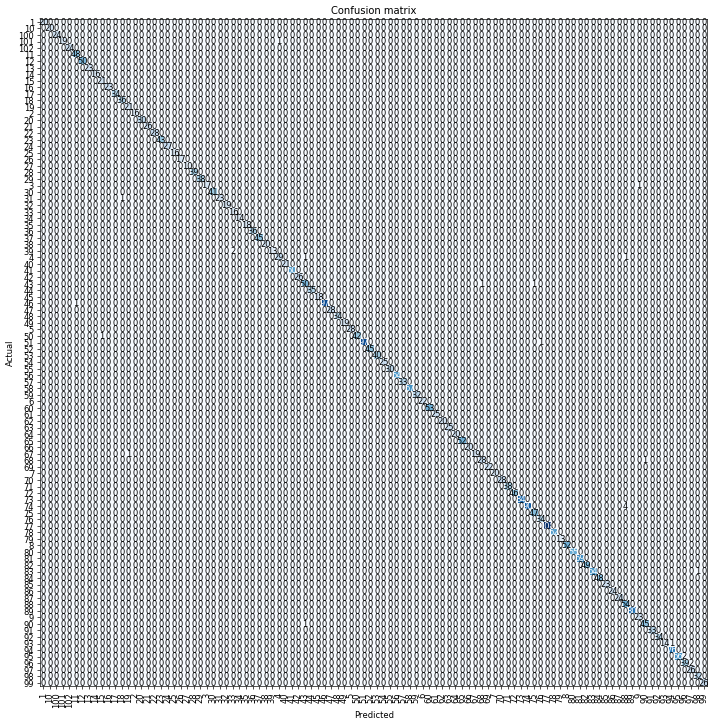

In [12]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [13]:
interp.most_confused()

[('74', '88', 4),
 ('39', '33', 2),
 ('95', '96', 2),
 ('96', '97', 2),
 ('101', '4', 1),
 ('3', '9', 1),
 ('31', '18', 1),
 ('4', '43', 1),
 ('4', '88', 1),
 ('43', '68', 1),
 ('43', '75', 1),
 ('46', '11', 1),
 ('50', '15', 1),
 ('51', '76', 1),
 ('67', '19', 1),
 ('68', '90', 1),
 ('83', '98', 1),
 ('90', '43', 1),
 ('93', '94', 1)]

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.31E-06
Min loss divided by 10: 6.31E-08


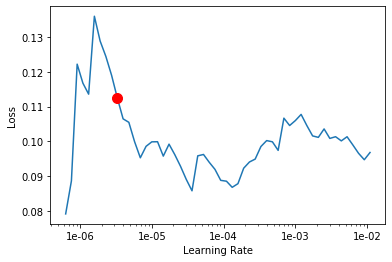

In [15]:
learn.recorder.plot(suggestion=True)

In [16]:
learn.unfreeze()

In [17]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.044774,0.817450,0.778047,11:15
1,0.769403,0.627977,0.854639,11:11
2,0.337096,0.143118,0.959817,11:14
3,0.148468,0.042207,0.989482,11:25
4,0.097700,0.029519,0.994067,11:18


In [18]:
learn.save('resnet-152-stage-2')

In [19]:
learn.export()

In [20]:
learn_path = learn.path
print(learn_path)

C:\Users\sanja\Desktop\flowerdet\data\train1


In [21]:
learn = load_learner(learn_path)

In [22]:
test = pd.read_csv('C:/Users/sanja/Desktop/flowerdet/data/test.csv')

In [23]:
test_path = Path('C:/Users/sanja/Desktop/flowerdet/data/test')

In [24]:
images = []
prediction = []
#probability = []
for i in test['image_id']:
  images.append(i)
  link = str(test_path)+'/'+str(i)+'.jpg'
  img = open_image(link)
  pred_class,pred_idx,outputs = learn.predict(img)
  prediction.append(pred_class.obj)
  #probability.append(outputs.abs().max().item())
answer = pd.DataFrame({'image_id':images,'category':prediction})
answer.head()
answer.to_csv('submission_resnet152-norm-base.csv')

In [44]:
path = 'C:/Users/sanja/Desktop/flowerdet/data/train1'

In [34]:
def get_data(sz):
    data = (ImageList.from_folder(path) 
            .split_by_rand_pct()              
            .label_from_folder()            
            .add_test_folder(test_folder = 'C:/Users/sanja/Desktop/flowerdet/data/test')              
            .transform(tfms, size=sz)
            .databunch(bs=16,num_workers=30)).normalize(imagenet_stats)
    return data

In [35]:
learn50 = cnn_learner(get_data(8), models.resnet152, metrics=accuracy,model_dir="models/")
learn50.save('res152_0')

In [36]:
def train_model(sz,i):
    learn50=cnn_learner(get_data(sz),models.resnet152, metrics=[accuracy],model_dir="models/").load('res152_'+str(sz-8))
    print(learn50.path)
    learn50.fit_one_cycle(6*i)
    learn50.recorder.plot()
    learn50.unfreeze()
    learn50.fit_one_cycle(2*i)
    learn50.save('res152_'+str(sz))

C:\Users\sanja\Desktop\flowerdet\data\train1


epoch,train_loss,valid_loss,accuracy,time
0,4.353959,1918.640137,0.072006,05:21
1,4.077854,231.559830,0.092503,05:16
2,3.936742,69.917336,0.117314,05:18
3,3.785094,8.102382,0.129720,05:14
4,3.711540,11.033036,0.149407,05:16
5,3.739186,15.969145,0.145631,05:19


epoch,train_loss,valid_loss,accuracy,time
0,3.784485,3.576000,0.138619,06:19
1,3.457575,3.479613,0.219525,06:17


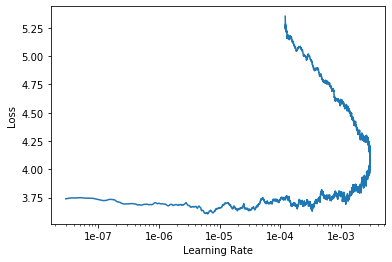

In [29]:
train_model(8, 1)

C:\Users\sanja\Desktop\flowerdet\data\train1


epoch,train_loss,valid_loss,accuracy,time
0,3.677542,3.958162,0.181769,05:15
1,3.513774,3.425883,0.207659,05:17
2,3.353646,3.375505,0.249191,05:19
3,3.229842,3.489464,0.285329,05:14
4,3.203729,2.958780,0.298004,05:18
5,3.155000,5.245879,0.297735,05:18
6,3.010086,2.684730,0.329018,05:13
7,3.053329,7.477444,0.368393,05:16
8,2.910786,2.882441,0.361111,05:17
9,2.867784,2.671667,0.372438,05:11


epoch,train_loss,valid_loss,accuracy,time
0,3.198640,3.601021,0.298274,06:17
1,3.100930,3.592083,0.312298,06:21
2,2.869034,2.841337,0.385383,06:19
3,2.620552,2.332942,0.420173,06:18


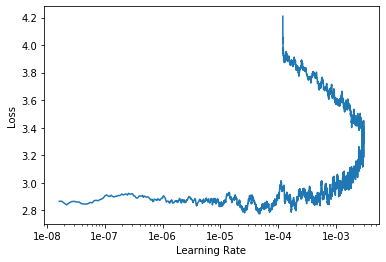

In [30]:
train_model(16,2)

C:\Users\sanja\Desktop\flowerdet\data\train1


epoch,train_loss,valid_loss,accuracy,time
0,3.159551,2.864456,0.328209,05:19
1,2.946864,2.639158,0.361381,05:18
2,2.829072,4.113678,0.405070,05:18
3,2.725950,3.063275,0.396980,05:19
4,2.680627,2.271796,0.437433,05:21
5,2.546518,10.690168,0.450647,05:20
6,2.527632,16.928265,0.473840,05:17
7,2.491071,32.768482,0.478964,05:22
8,2.466452,17.781685,0.494067,05:18
9,2.414138,186.371246,0.500270,05:20


epoch,train_loss,valid_loss,accuracy,time
0,2.482058,2.093119,0.486246,06:13
1,2.613851,3.675816,0.432848,06:17
2,2.366369,1.855023,0.504585,06:18
3,1.974399,1.545839,0.572816,06:14
4,1.805338,1.370247,0.632147,06:19
5,1.662711,1.313651,0.638350,06:21


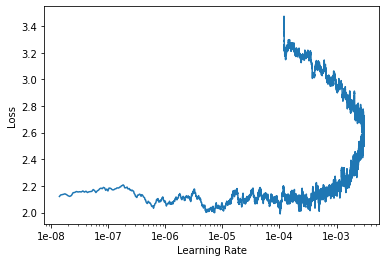

In [31]:
train_model(24,3)

C:\Users\sanja\Desktop\flowerdet\data\train1


epoch,train_loss,valid_loss,accuracy,time
0,1.983450,1.410067,0.620011,06:57
1,1.880255,1.381088,0.636462,06:57
2,1.781355,1.819490,0.640507,06:59
3,1.799395,2.882593,0.634035,06:56
4,1.806975,3.040065,0.647249,06:57
5,1.742165,22.389317,0.642664,06:57
6,1.746809,79.313744,0.647249,06:55
7,1.877679,11478.351562,0.647519,06:56
8,1.760262,45085.742188,0.668554,06:56
9,1.688270,2121.194336,0.679342,06:55


epoch,train_loss,valid_loss,accuracy,time
0,1.499324,188.994003,0.718986,08:04
1,1.846367,1.554733,0.622438,08:07
2,1.877964,3.000159,0.572816,07:59
3,1.688062,3.115779,0.643743,08:04
4,1.585948,1.095188,0.720334,07:58
5,1.381709,0.942592,0.741640,07:55
6,1.138905,1.125122,0.763215,07:58
7,1.154974,0.843436,0.781014,07:58


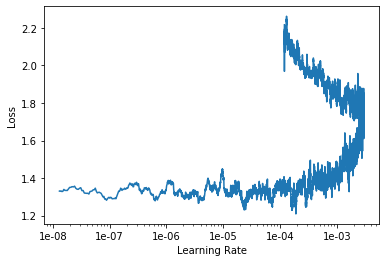

In [32]:
train_model(32,4)

In [33]:
sz = 64; i = 5
learn50 = cnn_learner(get_data(sz), models.resnet152, metrics=[accuracy],model_dir="models/").load('res152_32')
learn50.fit_one_cycle(6*i)
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res152_'+str(sz))

epoch,train_loss,valid_loss,accuracy,time
0,1.978623,1.368197,0.623247,07:02
1,1.643616,1.077062,0.710356,06:57
2,1.396033,1.005115,0.749730,07:04
3,1.359929,0.858323,0.780744,07:10
4,1.206796,0.726303,0.800971,07:05
5,1.195146,0.682378,0.811489,06:59
6,1.131426,0.644595,0.814725,07:00
7,1.067977,1.107265,0.812837,07:00
8,1.069291,1.766191,0.815534,07:03
9,1.065535,0.608835,0.832255,07:06


epoch,train_loss,valid_loss,accuracy,time
0,0.715109,8.823402,0.851942,09:24
1,1.086377,1.471787,0.781014,08:23
2,1.196106,0.752781,0.792071,08:16
3,1.081219,0.570006,0.831985,08:23
4,0.948203,2.670975,0.787217,08:18
5,0.732281,12.877551,0.848166,08:19
6,0.664592,45.034729,0.867314,08:21
7,0.549949,5.315404,0.906149,08:24
8,0.444851,1.227063,0.923139,08:37
9,0.436704,0.629450,0.929881,08:49


In [17]:
sz = 128; i = 5
learn50 = cnn_learner(get_data(sz), models.resnet152, metrics=[accuracy], callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_128_res152')],model_dir="models/").load('res152_64')
learn50.fit_one_cycle(6*i)
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res152_'+str(sz))

epoch,train_loss,valid_loss,accuracy,time
0,0.864588,0.436193,0.885653,09:30
1,0.636025,0.275621,0.925297,10:27
2,0.558177,0.214702,0.946602,09:22
3,0.515066,0.418322,0.949569,09:45
4,0.462251,0.154194,0.959008,08:59
5,0.472914,0.153496,0.954423,08:55
6,0.487012,0.181103,0.946602,08:30
7,0.444176,0.166861,0.948759,08:58
8,0.459923,0.200902,0.950378,08:44
9,0.467981,0.141752,0.959008,09:11


epoch,train_loss,valid_loss,accuracy,time
0,0.271835,0.078777,0.974110,17:12
1,0.512382,0.197099,0.938781,16:57
2,0.639149,0.333320,0.906958,16:50
3,0.583127,0.228032,0.929072,16:47
4,0.452565,0.167822,0.947411,17:07
5,0.375184,0.148709,0.957120,16:58
6,0.245044,0.098180,0.967907,16:50
7,0.170088,0.052904,0.984358,17:04
8,0.128305,0.040398,0.987325,17:12
9,0.144482,0.036684,0.988943,17:03


In [10]:
sz = 244; i = 6 #7
#learn50 = cnn_learner(get_data(sz), models.resnet152, metrics=[accuracy], callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_224_res152')],model_dir="models/").load('res152_128')
#learn50.fit_one_cycle(6*i)
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res152_'+str(sz))

epoch,train_loss,valid_loss,accuracy,time
0,4.383531,72.468346,0.098975,06:59
1,4.037479,3.740943,0.136192,06:52
2,3.866627,3.541815,0.155609,06:49
3,3.635509,3.521543,0.182578,07:05
4,3.432527,3.228593,0.225189,06:56
5,3.395770,4.126894,0.228695,06:58
6,3.245810,6.555807,0.241640,06:53
7,3.149957,4.728273,0.268339,06:56
8,3.025920,5.154848,0.288565,06:56
9,3.033463,4.164130,0.296117,07:01


In [14]:
learn50.load('res152_244')
test_path = Path('C:/Users/sanja/Desktop/flowerdet/data/test')
test = pd.read_csv('C:/Users/sanja/Desktop/flowerdet/data/test.csv')

images = []
prediction = []
#probability = []
for i in test[
'image_id']:
  images.append(i)
  link = str(test_path)+'/'+str(i)+'.jpg'
  img = open_image(link)
  pred_class,pred_idx,outputs = learn50.predict(img)
  prediction.append(pred_class.obj)
  #probability.append(outputs.abs().max().item())
answer = pd.DataFrame({'image_id':images,'category':prediction})
answer.head()
answer.to_csv('submission_resnet152-norm-244-pis.csv')

In [18]:
final_pred=[]
images=[]
test = pd.read_csv('C:/Users/sanja/Desktop/flowerdet/data/test.csv')
test1=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_densenet1-161orm(2).csv')
test2=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_resnet50-norm-244-pis(2).csv')
test3=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_resnet50-norm-base(2).csv')
test4=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_resnet50-norm-244-1-mixup(2).csv')
test5=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/ensemble-submission(89).csv')
test6=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_resnet152-norm-base.csv')
test7=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_resnet152-norm-244-pis.csv')
test8=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/ensemble-submission-2(89).csv')
default=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/ensemble-submission-3(89.1577).csv')

test1val=test1['category'].values
test2val=test2['category'].values
test3val=test3['category'].values
test4val=test4['category'].values
test5val=test5['category'].values
test6val=test6['category'].values
test7val=test7['category'].values
test8val=test8['category'].values
defaultval=default['category'].values
t=0
for i in test['image_id']:
    data=([test1val[t],test2val[t],test3val[t],test4val[t],test5val[t],test6val[t],test7val[t],test8val[t],defaultval[t]])
    images.append(i)
    try:
        final_pred.append(mode(data))
    except:
        final_pred.append(defaultval[t])
        print('hi')
    t=t+1
answer=pd.DataFrame({'image_id':images,'category':final_pred})
answer.head()
answer.to_csv('ensemble-submission-4.csv')
    

hi
hi
hi
hi


In [37]:
learn50 = cnn_learner(get_data(8), models.resnet152, metrics=[accuracy],model_dir="models/").mixup()
learn50.save('res152_mixup_0')

In [38]:
def train_model(sz,i):
    learn50=cnn_learner(get_data(sz),models.resnet152, metrics=[accuracy],model_dir="models/").load('res152_mixup_'+str(sz-8)).mixup()
    learn50.fit_one_cycle(6*i)
    learn50.recorder.plot()
    learn50.unfreeze()
    learn50.fit_one_cycle(2*i)
    learn50.save('res152_mixup_'+str(sz))

epoch,train_loss,valid_loss,accuracy,time
0,4.517040,1194.745728,0.072816,06:12
1,4.295151,130.277847,0.089266,06:08
2,4.137573,75.009201,0.112729,06:06
3,4.035556,107.935196,0.131338,06:07
4,4.012932,35.559231,0.140237,06:05
5,3.988024,39.457653,0.147519,06:13


epoch,train_loss,valid_loss,accuracy,time
0,4.038219,3.600040,0.152104,07:11
1,3.807585,3.316676,0.209817,07:06


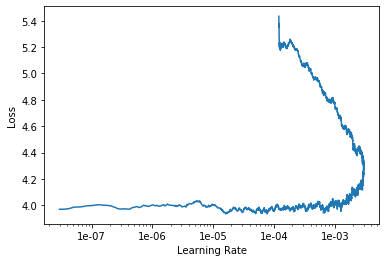

In [21]:
train_model(8,1)

epoch,train_loss,valid_loss,accuracy,time
0,3.974895,3.584911,0.165858,06:14
1,3.811339,3.333061,0.199838,06:13
2,3.721378,3.180167,0.218716,06:14
3,3.679080,3.025550,0.266990,06:16
4,3.600131,3.344376,0.281823,06:03
5,3.542055,3.636309,0.293959,06:04
6,3.513608,5.464606,0.310140,06:07
7,3.429379,4.386846,0.325512,06:07
8,3.498246,2.863967,0.341963,06:14
9,3.349427,2.686950,0.360032,06:12


epoch,train_loss,valid_loss,accuracy,time
0,3.685570,3.039971,0.278317,07:10
1,3.689301,3.494940,0.251348,07:08
2,3.377039,3.050260,0.362460,07:09
3,3.268773,7.245728,0.365696,08:12


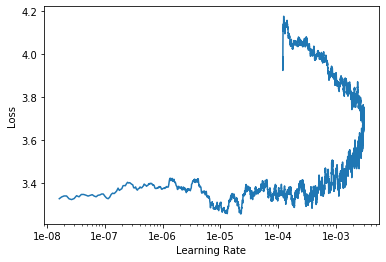

In [22]:
train_model(16,2)

epoch,train_loss,valid_loss,accuracy,time
0,3.537639,2.922016,0.317152,06:50
1,3.483888,4.886076,0.340885,06:50
2,3.456961,4.217589,0.340345,06:19
3,3.394072,56.507725,0.369202,06:15
4,3.378831,18.503059,0.365696,06:24
5,3.316391,8.416727,0.394283,06:20
6,3.268786,3.795154,0.408037,06:15
7,3.258045,8188.414062,0.403722,06:19
8,3.223825,11883.583984,0.431769,06:22
9,3.160906,24950.982422,0.452805,06:08


epoch,train_loss,valid_loss,accuracy,time
0,3.082278,1206.600830,0.457389,07:15
1,3.172709,2.248598,0.419633,07:12
2,3.058264,2.613249,0.399946,07:07
3,2.956418,2.112163,0.515642,07:36
4,2.810267,1.906274,0.562028,08:00
5,2.762928,1.822590,0.574703,07:53


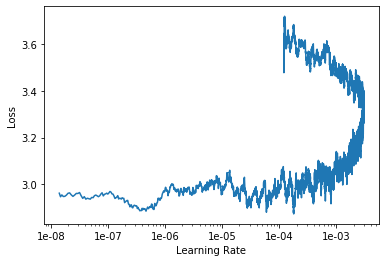

In [23]:
train_model(24,3) 

epoch,train_loss,valid_loss,accuracy,time
0,2.780760,2.316246,0.549622,08:05
1,2.795194,2.793153,0.558792,07:55
2,2.755987,3.360726,0.574973,07:54
3,2.745557,2.011120,0.587648,07:58
4,2.688126,4.167839,0.578749,07:54
5,2.625476,15.327550,0.588457,07:51
6,2.703903,177.290924,0.569310,07:51
7,2.650250,14800.897461,0.583873,07:50
8,2.662170,124.947678,0.611381,07:51
9,2.662105,1005.806213,0.617044,07:57


epoch,train_loss,valid_loss,accuracy,time
0,2.578383,101.414375,0.635922,08:54
1,2.730273,2.403409,0.559871,08:51
2,2.784358,1.710767,0.557983,08:51
3,2.577746,7.050730,0.570658,08:51
4,2.459040,1.414752,0.655340,08:50
5,2.372143,25.505045,0.662082,08:50
6,2.279129,9.905333,0.703074,08:51
7,2.285938,6.311421,0.716289,08:51


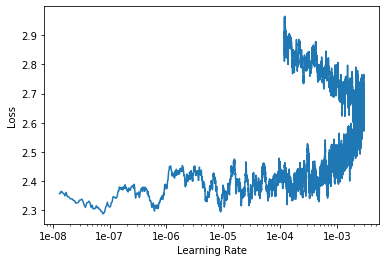

In [39]:
train_model(32,4)

epoch,train_loss,valid_loss,accuracy,time
0,2.653145,3.744199,0.573085,07:59
1,2.454896,2.395439,0.641855,07:55
2,2.422199,1.647433,0.687433,07:58
3,2.252193,1.274359,0.718177,08:01
4,2.255988,1.708180,0.731931,07:58
5,2.209249,1.605294,0.753236,07:58
6,2.175432,1.615043,0.756742,08:04
7,2.185247,1.076902,0.779126,08:03
8,2.111150,1.122830,0.779126,08:04
9,2.146222,0.852802,0.797195,08:00


Better model found at epoch 0 with accuracy value: 0.5922330021858215.


epoch,train_loss,valid_loss,accuracy,time
0,1.908630,1.696016,0.814995,09:20
1,2.098480,0.791517,0.803128,09:19
2,2.199192,0.909130,0.767530,09:21
3,2.106776,0.730648,0.806365,09:19
4,2.030001,1.114739,0.795307,09:21
5,1.919588,11.321882,0.823625,09:21
6,1.801539,62.931240,0.849245,09:23
7,1.749774,3.051890,0.889698,09:22
8,1.624275,7.659161,0.898328,09:22
9,1.651603,21.128384,0.878910,09:23


Better model found at epoch 0 with accuracy value: 0.5922330021858215.


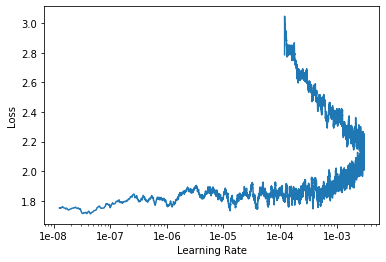

In [42]:
sz=64; i=5
learn50=cnn_learner(get_data(sz),models.resnet152, metrics=[accuracy],callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_64_res152_mixup')],model_dir="models/").load('res152_mixup_'+str(32)).mixup()
learn50.fit_one_cycle(6*i)
learn50.recorder.plot()
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res152_mixup_'+str(sz))

In [ ]:
sz=128; i=5
learn50=cnn_learner(get_data(sz),models.resnet152, metrics=[accuracy],callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_128_res152_mixup')],model_dir="models/").load('res152_mixup_'+str(64)).mixup()
learn50.fit_one_cycle(6*i)
learn50.recorder.plot()
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res152_mixup_'+str(sz))

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,1.573530,0.226159,0.965210,05:56
1,1.422641,0.157441,0.974919,06:03
2,1.426597,0.123560,0.981122,05:50
3,1.389376,0.113249,0.984897,05:51
4,1.361396,0.100280,0.985976,05:46
5,1.382553,0.094211,0.988403,05:55
6,1.417472,0.091603,0.990022,06:11
7,1.337991,0.096377,0.988943,06:02
8,1.374479,0.103588,0.987864,05:59
9,1.348667,0.098742,0.985976,05:54


epoch,train_loss,valid_loss,accuracy,time
0,1.189556,0.059908,0.997573,07:37
1,1.236899,0.080737,0.988943,07:35
2,1.441032,0.141873,0.972762,07:29
3,1.421394,0.174159,0.967098,07:33
4,1.432085,0.245581,0.968447,07:49
5,1.439356,0.177742,0.967368,07:38
6,1.406658,0.115537,0.984628,07:19
7,1.314240,0.108078,0.988403,07:19
8,1.323928,0.080810,0.991370,07:19
9,1.195239,0.059672,0.993258,07:25


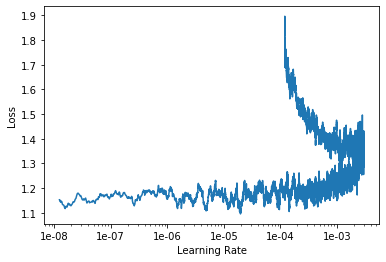

In [38]:
sz=244; i=6
learn50=cnn_learner(get_data(sz),models.resnet152, metrics=[accuracy],callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_244_res152_mixup')],model_dir="models/").load('res152_mixup_'+str(128)).mixup()
learn50.fit_one_cycle(6*i)
learn50.recorder.plot()
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res152_mixup_'+str(sz))

In [ ]:
 learn50.load('res152_mixup_244')
test_path = Path('C:/Users/sanja/Desktop/flowerdet/data/test')
test = pd.read_csv('C:/Users/sanja/Desktop/flowerdet/data/test.csv')

images = []
prediction = []
#probability = []
for i in test['image_id']:
  images.append(i)
  link = str(test_path)+'/'+str(i)+'.jpg'
  img = open_image(link)
  pred_class,pred_idx,outputs = learn50.predict(img)
  prediction.append(pred_class.obj)
  #probability.append(outputs.abs().max().item())
answer = pd.DataFrame({'image_id':images,'category':prediction})
answer.head()
answer.to_csv('submission_resnet152-norm-244-1-mixup.csv')

In [40]:
final_pred=[]
images=[]
test = pd.read_csv('C:/Users/sanja/Desktop/flowerdet/data/test.csv')

test1=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_densenet1-161orm(2).csv')
test2=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_resnet50-norm-244-pis(2).csv')
test3=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_resnet50-norm-base(2).csv')
test4=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_resnet50-norm-244-1-mixup(2).csv')
test5=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/ensemble-submission(89).csv')
test6=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_resnet152-norm-base.csv')
test7=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_resnet152-norm-244-pis.csv')
test8=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/ensemble-submission-2(89).csv')
test9=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/ensemble-submission-3(89.1577).csv')

default=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/ensemble-submission-4.csv')

test1val=test1['category'].values
test2val=test2['category'].values
test3val=test3['category'].values
test4val=test4['category'].values
test5val=test5['category'].values
test6val=test6['category'].values
test7val=test7['category'].values
test8val=test8['category'].values
test9val=test9['category'].values
defaultval=default['category'].values
t=0
for i in test['image_id']:
    data=([test1val[t],test2val[t],test3val[t],test4val[t],test5val[t],test6val[t],test7val[t],test8val[t],test9val[t],defaultval[t]])
    images.append(i) 
    try:
        final_pred.append(mode(data))
    except:
        final_pred.append(defaultval[t])
    t=t+1
answer=pd.DataFrame({'image_id':images,'category':final_pred})
answer.head()
answer.to_csv('ensemble-submission-5.csv')
    